## Ferhat ONARAN
** 19050351003 **

In [1]:
import pandas as pd
import numpy as np


In [2]:
pip install pydataset

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pydataset

In [4]:
df=pydataset.data('iris')

Store the data to df variable. This data set is stored as pandas dataframe.

Inspect the head of the dataset.

In [5]:
 df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


I shall visualize the values of each features to see the range and distribution of values. This visualization will help me in the next steps to select a suitable feature for my machine learning model.

In [6]:
x_names=list(df.columns[:4])
from matplotlib import pyplot as plt

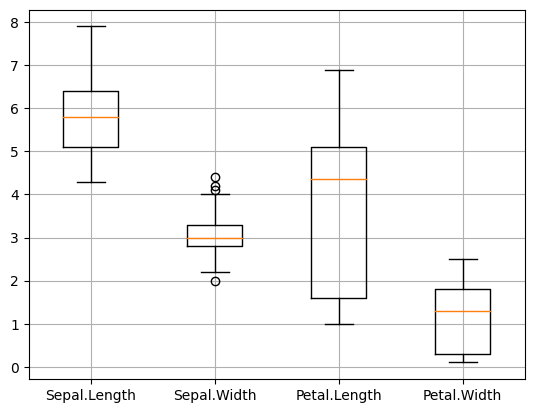

In [7]:
plt.boxplot(df.iloc[:,0:4].values);
plt.xticks([1,2,3,4],x_names);
plt.grid();
plt.show();

My visual observation are

Sepal length is in the range of 5 to 6.5
Sepal width is around 3
Petal length is in the range of 1.5 to 5.2
Petal width is in the range of 0.5 to 1.8

**Any values other than this range are considered as outliers. I can observe few outliers in in Sepal Width**

In [8]:
df=df.rename(columns=({'Sepal.Length':'SepLength','Sepal.Width':'SepWidth','Petal.Length':'PetLength','Petal.Width':'PetWidth'}))

SepWidth_quantile=df.SepWidth.quantile([0.25,0.5,0.75])
SepWidth_quantile

In [9]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a column named 'SepWidth'
SepWidth_quantile = df['SepWidth'].quantile([0.25, 0.75])
SepWidth_iqr = SepWidth_quantile[0.75] - SepWidth_quantile[0.25]
SepWidth_iqr # Interquartile range


0.5

In [10]:
SepWidth_upper = SepWidth_quantile[0.75] + 1.5 * SepWidth_iqr
SepWidth_lower = SepWidth_quantile[0.25] - 1.5 * SepWidth_iqr
print(SepWidth_lower, SepWidth_upper)

2.05 4.05


In [11]:
df[(df.SepWidth <SepWidth_lower) | (df.SepWidth >SepWidth_upper)]

,SepLength,SepWidth,PetLength,PetWidth,Species
16,5.7,4.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor


Before removing these outlier I shall check if for these two species ‘setosa’ and ‘versicolor’ these are really outlier considering each species separately.

In [12]:
versicolor_quantile = df[df.Species=='versicolor'].SepWidth.quantile([0.25,.5,0.75])
versicolor_quantile

0.25    2.525
0.50    2.800
0.75    3.000
Name: SepWidth, dtype: float64

Get inter quantile range of sepal width for versicolor type of flower

In [13]:
versicolor_iqr=versicolor_quantile[0.75]-versicolor_quantile[0.25]
versicolor_iqr

0.4750000000000001

In [14]:
versicolor_lower = versicolor_quantile[0.25]-1.5*versicolor_iqr
versicolor_upper = versicolor_quantile[0.75]+1.5*versicolor_iqr
print(versicolor_lower, versicolor_upper)

1.8124999999999998 3.7125000000000004


I can observe that the outlier value of 2.0 found in previous step as a outlier is actually not an outlier when I consider only versicolor’s values. Hence I shall keep this record.

**Setosa outliers**

In [15]:
setosa_quantile = df[df.Species=='setosa'].SepWidth.quantile([0.25,.5,0.75])
setosa_quantile

0.25    3.200
0.50    3.400
0.75    3.675
Name: SepWidth, dtype: float64

In [16]:
setosa_iqr=versicolor_quantile[0.75]-versicolor_quantile[0.25]
setosa_iqr

0.4750000000000001

In [17]:
setosa_lower = setosa_quantile[0.25]-1.5*setosa_iqr
setosa_upper = setosa_quantile[0.75]+1.5*setosa_iqr
print(setosa_lower, setosa_upper)

2.4875 4.3875


Though 4.4, 4.1, 4.2 values of sepal width were selected as outliers at earlier step, I can observe that only 4.4 is outside the setosa_lower and setosa_upper boundaries. Hence, I shall mark only 4.4 as outlier and remove it from data point. I must note here that removal of a record from analysis is one of the options to handle outliers. There are other options as well which is out of this analysis.

In [18]:
df.shape

(150, 5)

Select records which are below the upper boundary

I have now 149 records for going forward with my analysis.

In [19]:
df=df[df.SepWidth<=setosa_upper]
df.shape

(149, 5)

Enabling this warning-ignore option to stop displaying warnings. This will help me keeping outputs tidy.

In [20]:
import warnings
warnings.filterwarnings('ignore')

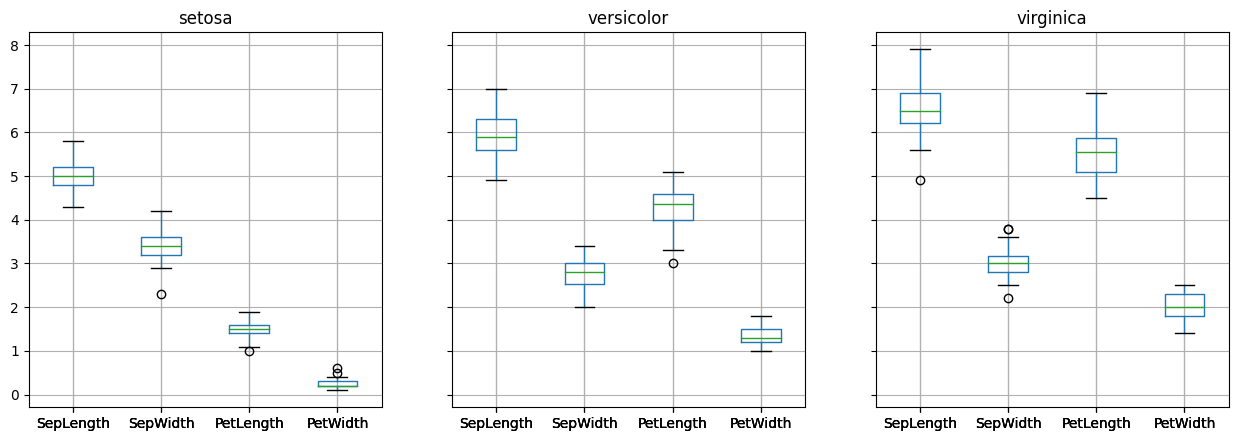

In [21]:
fig,ax_1 = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharey=True,sharex=True)
df.iloc[:,0:4].groupby(df.Species).boxplot(ax=ax_1);
plt.show();

From these box plots I can observe some outliers. Similar to previous outlier removal exercise I shall remove these outliers

In [22]:
qntl = df[df.Species == 'setosa'].SepWidth.quantile([0.25,0.5,0.75])
iqr  = qntl[0.75]-qntl[0.25]
lower = qntl[0.25] - 1.5*iqr
upper = qntl[0.75] + 1.5*iqr

In [23]:
df=df[~((df.Species == 'setosa')&(df.SepWidth<lower))]

In [24]:
qntl = df[df.Species == 'setosa'].PetLength.quantile([0.25,0.5,0.75])
iqr  = qntl[0.75]-qntl[0.25]
lower = qntl[0.25] - 1.5*iqr
upper = qntl[0.75] + 1.5*iqr

Remove the records of setosa which is outside the lower boundary. One record will be removed here.

In [25]:
df=df[~((df.Species == 'setosa')&(df.PetLength<lower))]

Petal Width

In [26]:
qntl = df[df.Species == 'setosa'].PetWidth.quantile([0.25,0.5,0.75])
iqr  = qntl[0.75]-qntl[0.25]
lower = qntl[0.25] - 1.5*iqr
upper = qntl[0.75] + 1.5*iqr

Remove the records of setosa which is outside the upper boundary. Two records will be removed here

Remove records for versicolor type.

In [27]:
qntl = df[df.Species == 'versicolor'].PetLength.quantile([0.25,0.5,0.75])
iqr  = qntl[0.75]-qntl[0.25]
lower = qntl[0.25] - 1.5*iqr
upper = qntl[0.75] + 1.5*iqr

In [28]:
df=df[~((df.Species == 'versicolor')&(df.PetLength<lower))]

In [29]:
qntl = df[df.Species == 'virginica'].SepLength.quantile([0.25,0.5,0.75])
iqr  = qntl[0.75]-qntl[0.25]
lower = qntl[0.25] - 1.5*iqr
upper = qntl[0.75] + 1.5*iqr

In [30]:
df=df[~((df.Species == 'virginica')&(df.SepLength<lower))]

In [31]:
df.shape

(145, 5)

In [32]:
qntl = df[df.Species == 'virginica'].SepWidth.quantile([0.25,0.5,0.75])
iqr  = qntl[0.75]-qntl[0.25]
lower = qntl[0.25] - 1.5*iqr
upper = qntl[0.75] + 1.5*iqr
print(lower,upper)

2.1999999999999993 3.8000000000000007


In [33]:
print('min=',df[(df.Species == 'virginica')]['SepWidth'].min())
print('max=',df[(df.Species == 'virginica')]['SepWidth'].max())

min= 2.2
max= 3.8


My observation are

Though earlier box plot for virginical species has shown outliner points for Sepal Width, these are not actual outliers.
Hence we will not remove any data points further.
Final count of records for analysis is

In [34]:
df.shape

(145, 5)

In [35]:
df.Species.value_counts()

Species
versicolor    49
virginica     49
setosa        47
Name: count, dtype: int64

In [36]:
PetLength={'setosa':df[df.Species=='setosa']['PetLength'],
   'versicolor':df[df.Species=='versicolor']['PetLength'],
   'virginica':df[df.Species=='virginica']['PetLength']}

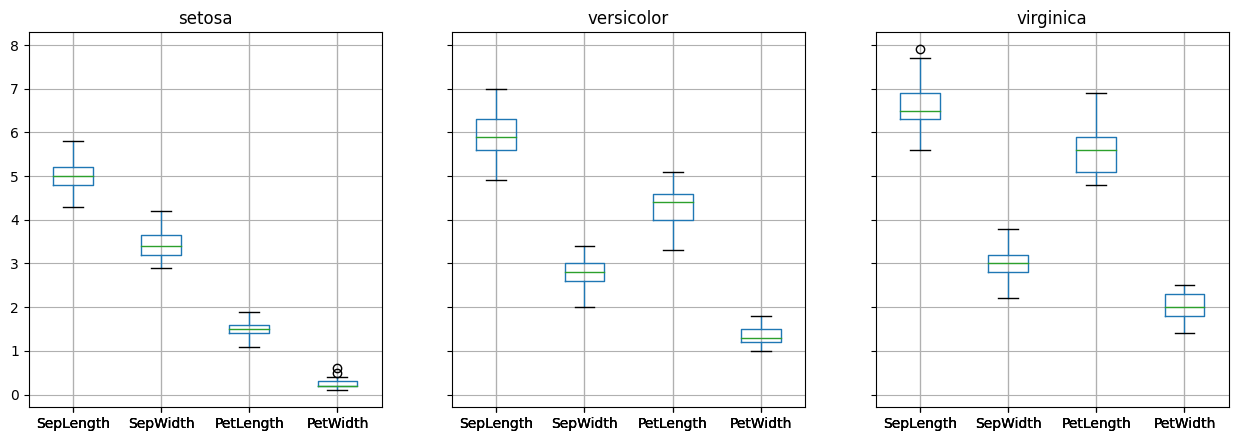

In [37]:
fig,ax_1 = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharey=True,sharex=True)
df.iloc[:,0:4].groupby(df.Species).boxplot(ax=ax_1);
plt.show();

From above box plots I can observe

Sepal length has overlapping values for versicolor and virginica
Sepal width has overlapping values for versicolor and virginica
Petal length has unique set of values for each species (there are no over lapping of values)
Petal Width also has unique set of values for each species (there may be a slight overlapping for versicolor and virginica).
From these observation I can choose ‘Petal Length’ and ‘Petal Width’ as the influential feature out of four features. For my analysis, I shall first choose the most influential feature ‘Petal Length’ and in the second iteration I shall include ‘Petal Width’ into my model.

In [38]:
type_dict = {'setosa':0,'versicolor':1,'virginica':2}
df['Species']=[type_dict[i] for i in df['Species']]

In [39]:
df_train_index=df.sample(frac=0.8,random_state=123).index

In [40]:
df_test_index=set(df.index).difference(set(df_train_index))
print('number of train records=',len(df_train_index),'| number of test records=',len(df_test_index))

number of train records= 116 | number of test records= 29


In [49]:
df_train = df.loc[df_train_index, :]
df_test = df.loc[list(df_test_index), :]


Pick up only Petal length feature. Petal length feature is the 3rd coloumn i.e. 2nd index of the array.
Reshape of the numpy array is done to make sure that the X_train is a column vector and also y_train is a column vector
Reshaping of data is required before feeding it to the machine learning package. However for different packages, the requirement of data format varies.

In [50]:
X_train = df_train.values[:,2].reshape(-1,1)
y_train = df_train.values[:,4].reshape(-1,1)

In [51]:
X_test = df_test.values[:,2].reshape(-1,1)
y_test = df_test.values[:,4].reshape(-1,1)



I shall use sklearn packages linear_model to create a logistic regression model

In [53]:
!pip install scikit-learn

from sklearn.linear_model import LogisticRegression

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 1.3 MB/s eta 0:00:08
                                              0.1/9.2 MB 1.1 MB/s eta 0:00:09
                                              0.2/9.2 MB 1.3 MB/s eta 0:00:07
     -                                        0.3/9.2 MB 1.8 MB/s eta 0:00:05
     --                                       0.5/9.2 MB 2.4 MB/s eta 0:00:04
     ---                                      0.7/9.2 MB 2.7 MB/s eta 0:00:04
     ---                                      0.7/9.2 MB 2.7 MB/s eta 0:00:04
     ----                                     1.0/9.2 MB 2.7 MB/s eta 0:00:04
     -----                                    1.3/9.2 MB 3.3 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.5 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.5 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.5 MB/s eta 0

In [54]:
lr_Petal_Length=LogisticRegression(random_state=123)

Fit train data to the model. This fit() method will find optimal values of coefficients by multiple iterations.

In [55]:
lr_Petal_Length.fit(X_train,y_train)
LogisticRegression(random_state=123)

LogisticRegression(random_state=123)

In [56]:
print('Train accuracy =',lr_Petal_Length.score(X_train,y_train), '| Test Accuracy =',lr_Petal_Length.score(X_test,y_test))

Train accuracy = 0.9655172413793104 | Test Accuracy = 0.9310344827586207


This model is created using only one feature ‘Petal Length’. With only one feature we get the test accuracy as 86%. This feature is the most influential to determine the type of species.

By choosing the most influential/important feature I have created a machine learning model which is simple but gives good accuracy. Next time some one approaches to me with data of Iris flower to identify its type, I shall tell him only to give me Petal Length and other features are not required.

This is the power of selecting correct feature.

coefficients of my model are as below.

In [57]:
print('coefficient=',lr_Petal_Length.coef_,'\nintercept=',lr_Petal_Length.intercept_,'\nnumber of iterations',lr_Petal_Length.n_iter_)

coefficient= [[-2.95084258]
 [-0.30267703]
 [ 3.25351961]] 
intercept= [ 10.67051202   3.24288513 -13.91339715] 
number of iterations [23]


Two Features (Petal Length and Petal Width)

In [58]:
X_train = df_train.values[:,2:4]
y_train = df_train.values[:,4].reshape(-1,1)

In [59]:
X_test = df_test.values[:,2:4]
y_test = df_test.values[:,4].reshape(-1,1)

In [60]:
lr_petLength_width=LogisticRegression(random_state=123)
lr_petLength_width.fit(X_train,y_train)

LogisticRegression(random_state=123)

In [61]:
print('Train accuracy=',lr_petLength_width.score(X_train,y_train),'Test accuracy=',lr_petLength_width.score(X_test,y_test))

Train accuracy= 0.9913793103448276 Test accuracy= 0.9310344827586207


Three Features (Petal Length & Width and Sepal Width)

In [62]:
X_train = df_train.values[:,1:4]
y_train = df_train.values[:,4].reshape(-1,1)

In [63]:
X_test = df_test.values[:,1:4]
y_test = df_test.values[:,4].reshape(-1,1)

In [64]:
lr_petLength_petWidth_SepWidth=LogisticRegression(random_state=123)
lr_petLength_petWidth_SepWidth.fit(X_train,y_train)

LogisticRegression(random_state=123)

In [65]:
print('Train accuracy=',lr_petLength_petWidth_SepWidth.score(X_train,y_train),'Test accuracy=',lr_petLength_petWidth_SepWidth.score(X_test,y_test))

Train accuracy= 0.9913793103448276 Test accuracy= 0.9310344827586207


All Features

In [66]:
X_train = df_train.values[:,0:4]
y_train = df_train.values[:,4].reshape(-1,1)

In [67]:
X_test = df_test.values[:,0:4]
y_test = df_test.values[:,4].reshape(-1,1)

In [68]:
lr_all=LogisticRegression(random_state=123)
lr_all.fit(X_train,y_train)

LogisticRegression(random_state=123)

In [69]:
print('Train accuracy=',lr_all.score(X_train,y_train),'Test accuracy=',lr_all.score(X_test,y_test))

Train accuracy= 0.9913793103448276 Test accuracy= 0.9310344827586207


The test accuracies of above models are

Only Petal Length 86.2%
Petal Length and Petal Width 96.5%
Petal Length & Width and Sepal Width 96.5%
With all features 96.5%
Machine learning model using only one feature ‘Petal Length’ achieves 86.2%. When the next influential feature ‘Petal Width’ is included along with ‘Petal Length’, the test accuracy of the model increased to 96.5%. However adding more features does not improve the test accuracy.

I can conclude that only two features ‘Petal Length’ and ‘Petal Width’ are the important features. Hence to build a machine learning model I need to use only these two features.